In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_pickle('maaslar.pkl')

In [3]:
x = data.iloc[:, 1].values.reshape(-1, 1)
y = data.iloc[:,2:].values.reshape(-1, 1)

In [4]:
X = data['Egitim Seviyesi']
Y = data['maas']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

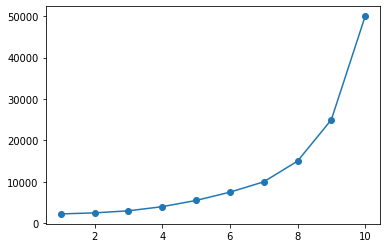

In [5]:
regressor_DT = DecisionTreeRegressor(random_state = 42)
# bir de cross validator yapalım da veriyi hayvan gibi ezberlemesin
#cross_val_score(regressor_DT, X, y, cv=10)

regressor_DT.fit(x,y)

plt.scatter(x,y)
plt.plot(x, regressor_DT.predict(x))

### biraz da geleceğe yönelik tahmin

In [6]:
print(regressor_DT.predict([[12]]))
print(regressor_DT.predict([[12]]))

print(regressor_DT.predict([[3]]))

# 50.000 in üzerinde tahmin yapmıyo yazık görmemiş çünkü hiç. aslında bu bir ağaç algoritmasının da dezavantajıdır

[50000.]
[50000.]
[3000.]


In [7]:
X = data[['Egitim Seviyesi']]
Y = data[['maas']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)
ols = DecisionTreeRegressor()
ols.fit(X, Y)

y_pred = ols.predict(X)

In [8]:
# Automating backward elimination technique

def DoBackwardElimination(the_regressor, X, y, minP2eliminate):
    
    assert np.shape(X)[0] == np.shape(y)[0], 'Length of X and y do not match'
    assert minP2eliminate > 0, 'Minimum P value to eliminate cannot be zero or negative'
    
    original_list = list(range(0, np.shape(the_regressor.pvalues)[0]))
    
    max_p = 10        # Initializing with random value of maximum P value
    i = 0
    r2adjusted = []   # Will store R Square adjusted value for each loop
    r2 = []           # Will store R Square value  for each loop
    list_of_originallist = [] # Will store modified index of X at each loop
    classifiers_list = [] # fitted classifiers at each loop
    
    while max_p >= minP2eliminate:
        
        p_values = list(the_regressor.pvalues)
        r2adjusted.append(the_regressor.rsquared_adj)
        r2.append(the_regressor.rsquared)
        list_of_originallist.append(original_list)
        
        max_p = max(p_values)
        max_p_idx = p_values.index(max_p)
        
        if max_p_idx == 0:
            
            temp_p = set(p_values)
            
            # removing the largest element from temp list
            temp_p.remove(max(temp_p))
            
            max_p = max(temp_p)
            max_p_idx = p_values.index(max_p)
            
            print('Index value 0 found!! Next index value is {}'.format(max_p_idx))
            
            if max_p < minP2eliminate:
                
                print('Max P value found less than 0.1 with 0 index ...Loop Ends!!')
                
                break
                
        if max_p < minP2eliminate:
            
            print('Max P value found less than 0.1 without 0 index...Loop Ends!!')
            
            break
        
        val_at_idx = original_list[max_p_idx]
        
        idx_in_org_lst = original_list.index(val_at_idx)
        
        original_list.remove(val_at_idx)
        
        print('Popped column index out of original array is {} with P-Value {}'.format(val_at_idx, np.round(np.array(p_values)[max_p_idx], decimals= 4)))
        
        X_new = X[:, original_list]
        
        the_regressor = sm.OLS(endog = y, exog = X_new).fit()
        classifiers_list.append(the_regressor)
        
        print('==================================================================================================')
        
    return classifiers_list, r2, r2adjusted, list_of_originallist

In [9]:
ols = sm.OLS(endog = y_train, exog = X_train).fit()

# Looking at the summary of regressor
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.728
Model:                            OLS   Adj. R-squared (uncentered):              0.683
Method:                 Least Squares   F-statistic:                              16.07
Date:                Fri, 28 Jul 2023   Prob (F-statistic):                     0.00705
Time:                        21:31:27   Log-Likelihood:                         -74.803
No. Observations:                   7   AIC:                                      151.6
Df Residuals:                       6   BIC:                                      151.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


###  Decision Tree için şartları kendimiz belirlediğimiz ve bir knn gibi 5e bölünmüş veride işlem yapalım

In [10]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)
dtm.fit(x,y)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, min_samples_split=5)

In [11]:
print("R-Squared on train dataset={}".format(dtm.score(X_test,y_test)))

R-Squared on train dataset=0.43603078358208947


C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [12]:
dtm.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(dtm.score(X_test,y_test)))

R-Squared on test dataset=0.0


###  Hyperparameter tuning with GridSearchCV

In [13]:
param_grid = {
    "criterion": ["mse", "friedman_mse", "poisson"],
    "min_samples_split": [10, 20, 40],
    "max_depth": [2, 6, 8],
    "min_samples_leaf": [20, 40, 100],
    "max_leaf_nodes": [5, 20, 100],
}


grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(data.iloc[:,1:],y)

# kodda hata alıyorum çözemedim ama bir ara bak

C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constrai

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5),
             param_grid={'criterion': ['mse', 'friedman_mse', 'poisson'],
                         'max_depth': [2, 6, 8], 'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [15]:
y

array([[ 2250],
       [ 2500],
       [ 3000],
       [ 4000],
       [ 5500],
       [ 7500],
       [10000],
       [15000],
       [25000],
       [50000]], dtype=int64)

##  Random Forest Model çalışmalarını gerçekleştirelim

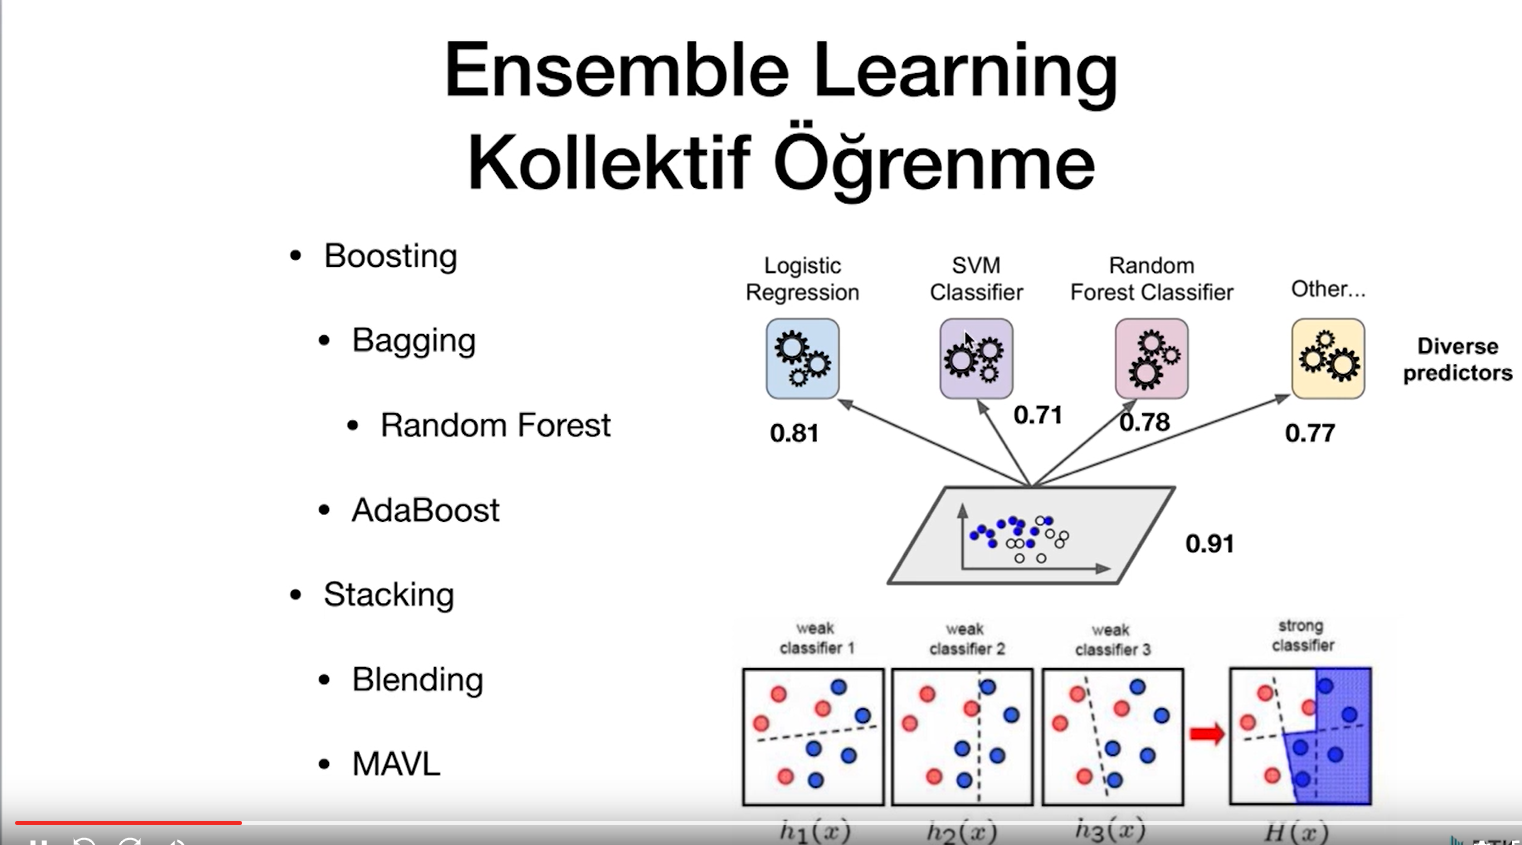

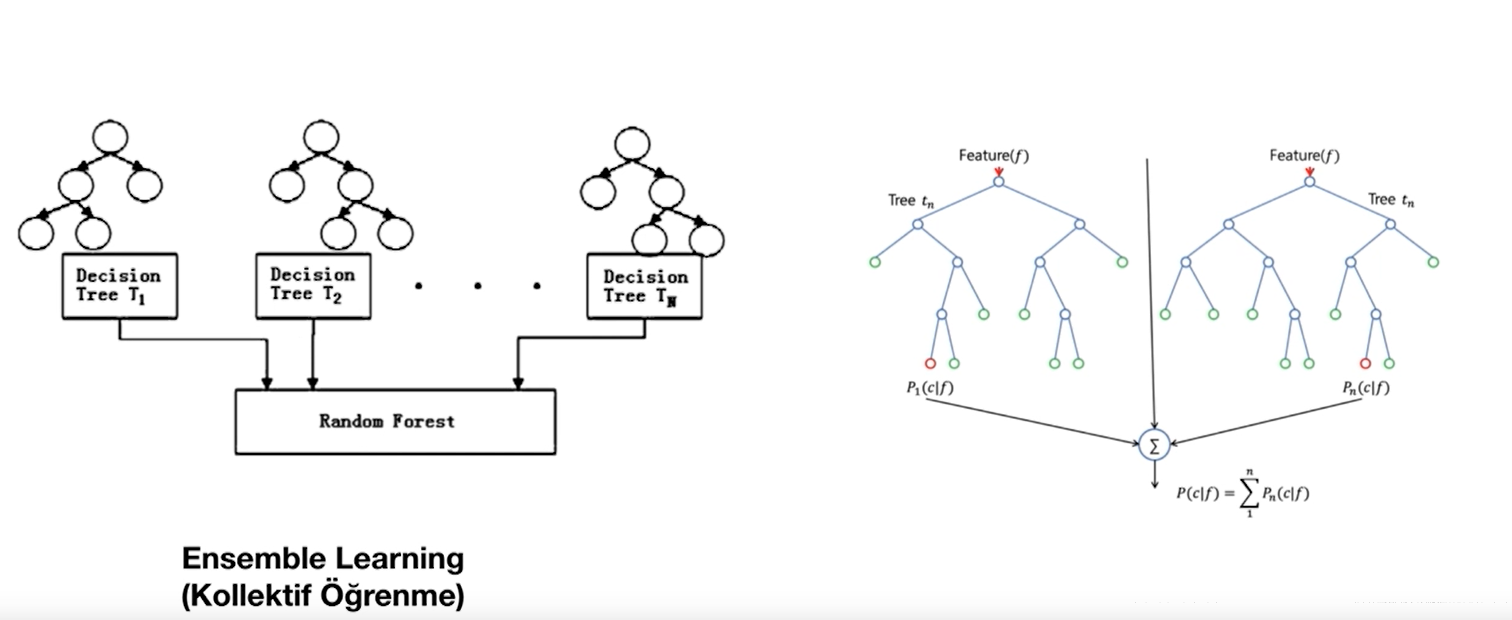

In [17]:
data = pd.read_pickle('maaslar.pkl')

In [18]:
rf_reg = RandomForestRegressor(n_estimators = 20 , criterion='squared_error',random_state = 42) 
# n_estimators anlamı kaç tane decision tree çizileceği. default 100dür.

rf_reg.fit(x,y.ravel())

RandomForestRegressor(n_estimators=20, random_state=42)

### mesela feature tahmini

In [19]:
data

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [21]:
print(rf_reg.predict([[5.5]]))

[6175.]


In [22]:
print(rf_reg.predict([[12]]))

[38625.]


### decision tree regressor ile arasındaki en büyük fark ne? decision tree modeli görmede, aralığının ötesindeki değerler için bir tahminleme gerçekleştiremiyordu. mesela eğitim seviyesi > 10 olduğu noktada 50.000 in üstünde bir değer veremişti çünkü fikri yoktu. random forest ve decision tree yi ayıran önemli farklardan biri bu.

### bunun olmasının en büyük sebebi ise şu, randomforest altıntaki decision tree modelleri tek seferde bütün veriyi görmüyor

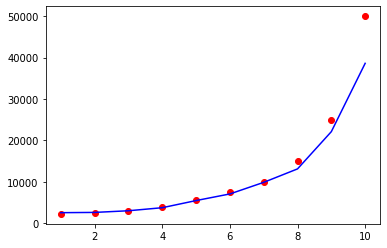

In [24]:
plt.scatter(x,y, color='red')
plt.plot(x,rf_reg.predict(x), color='blue')
plt.show()

C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

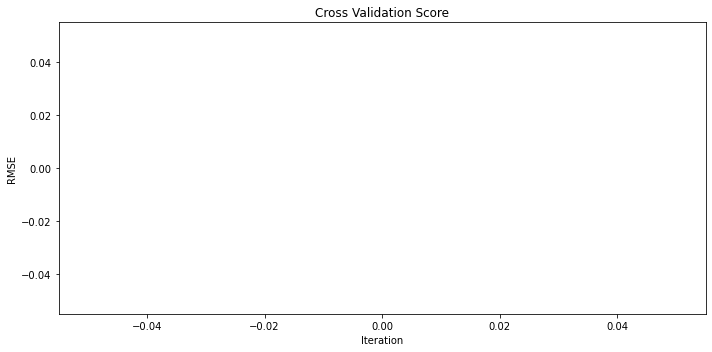

In [43]:
from sklearn.metrics import make_scorer, mean_squared_error

# Custom function for mean squared error without considering the 'False' parameter
def custom_mean_squared_error(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

scorer = make_scorer(custom_mean_squared_error)

cv_score = np.sqrt(-cross_val_score(estimator=rf_reg, X=X_train, y=y_train, cv=5, scoring=scorer))

plt.figure(figsize=(10, 5))
plt.bar(range(len(cv_score)), cv_score)
plt.title('Cross Validation Score')
plt.ylabel('RMSE')
plt.xlabel('Iteration')

plt.plot(range(len(cv_score) + 1), [cv_score.mean()] * (len(cv_score) + 1))
plt.tight_layout()


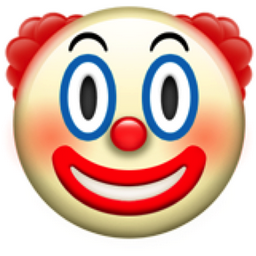
##                               bu kadar az veride pek görülür bi sapma olmuyo